In [ ]:
!nvidia-smi


Thu Jan  2 15:34:03 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install Ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.7 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="your_api_key_here")
project = rf.workspace("stuti-jain").project("pothole-detector-pm96b")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-Detector--1 in yolov8:: 100%|██████████| 644/644 [00:00<00:00, 5539.49it/s]


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 15.6 MB/s eta 0:00:00


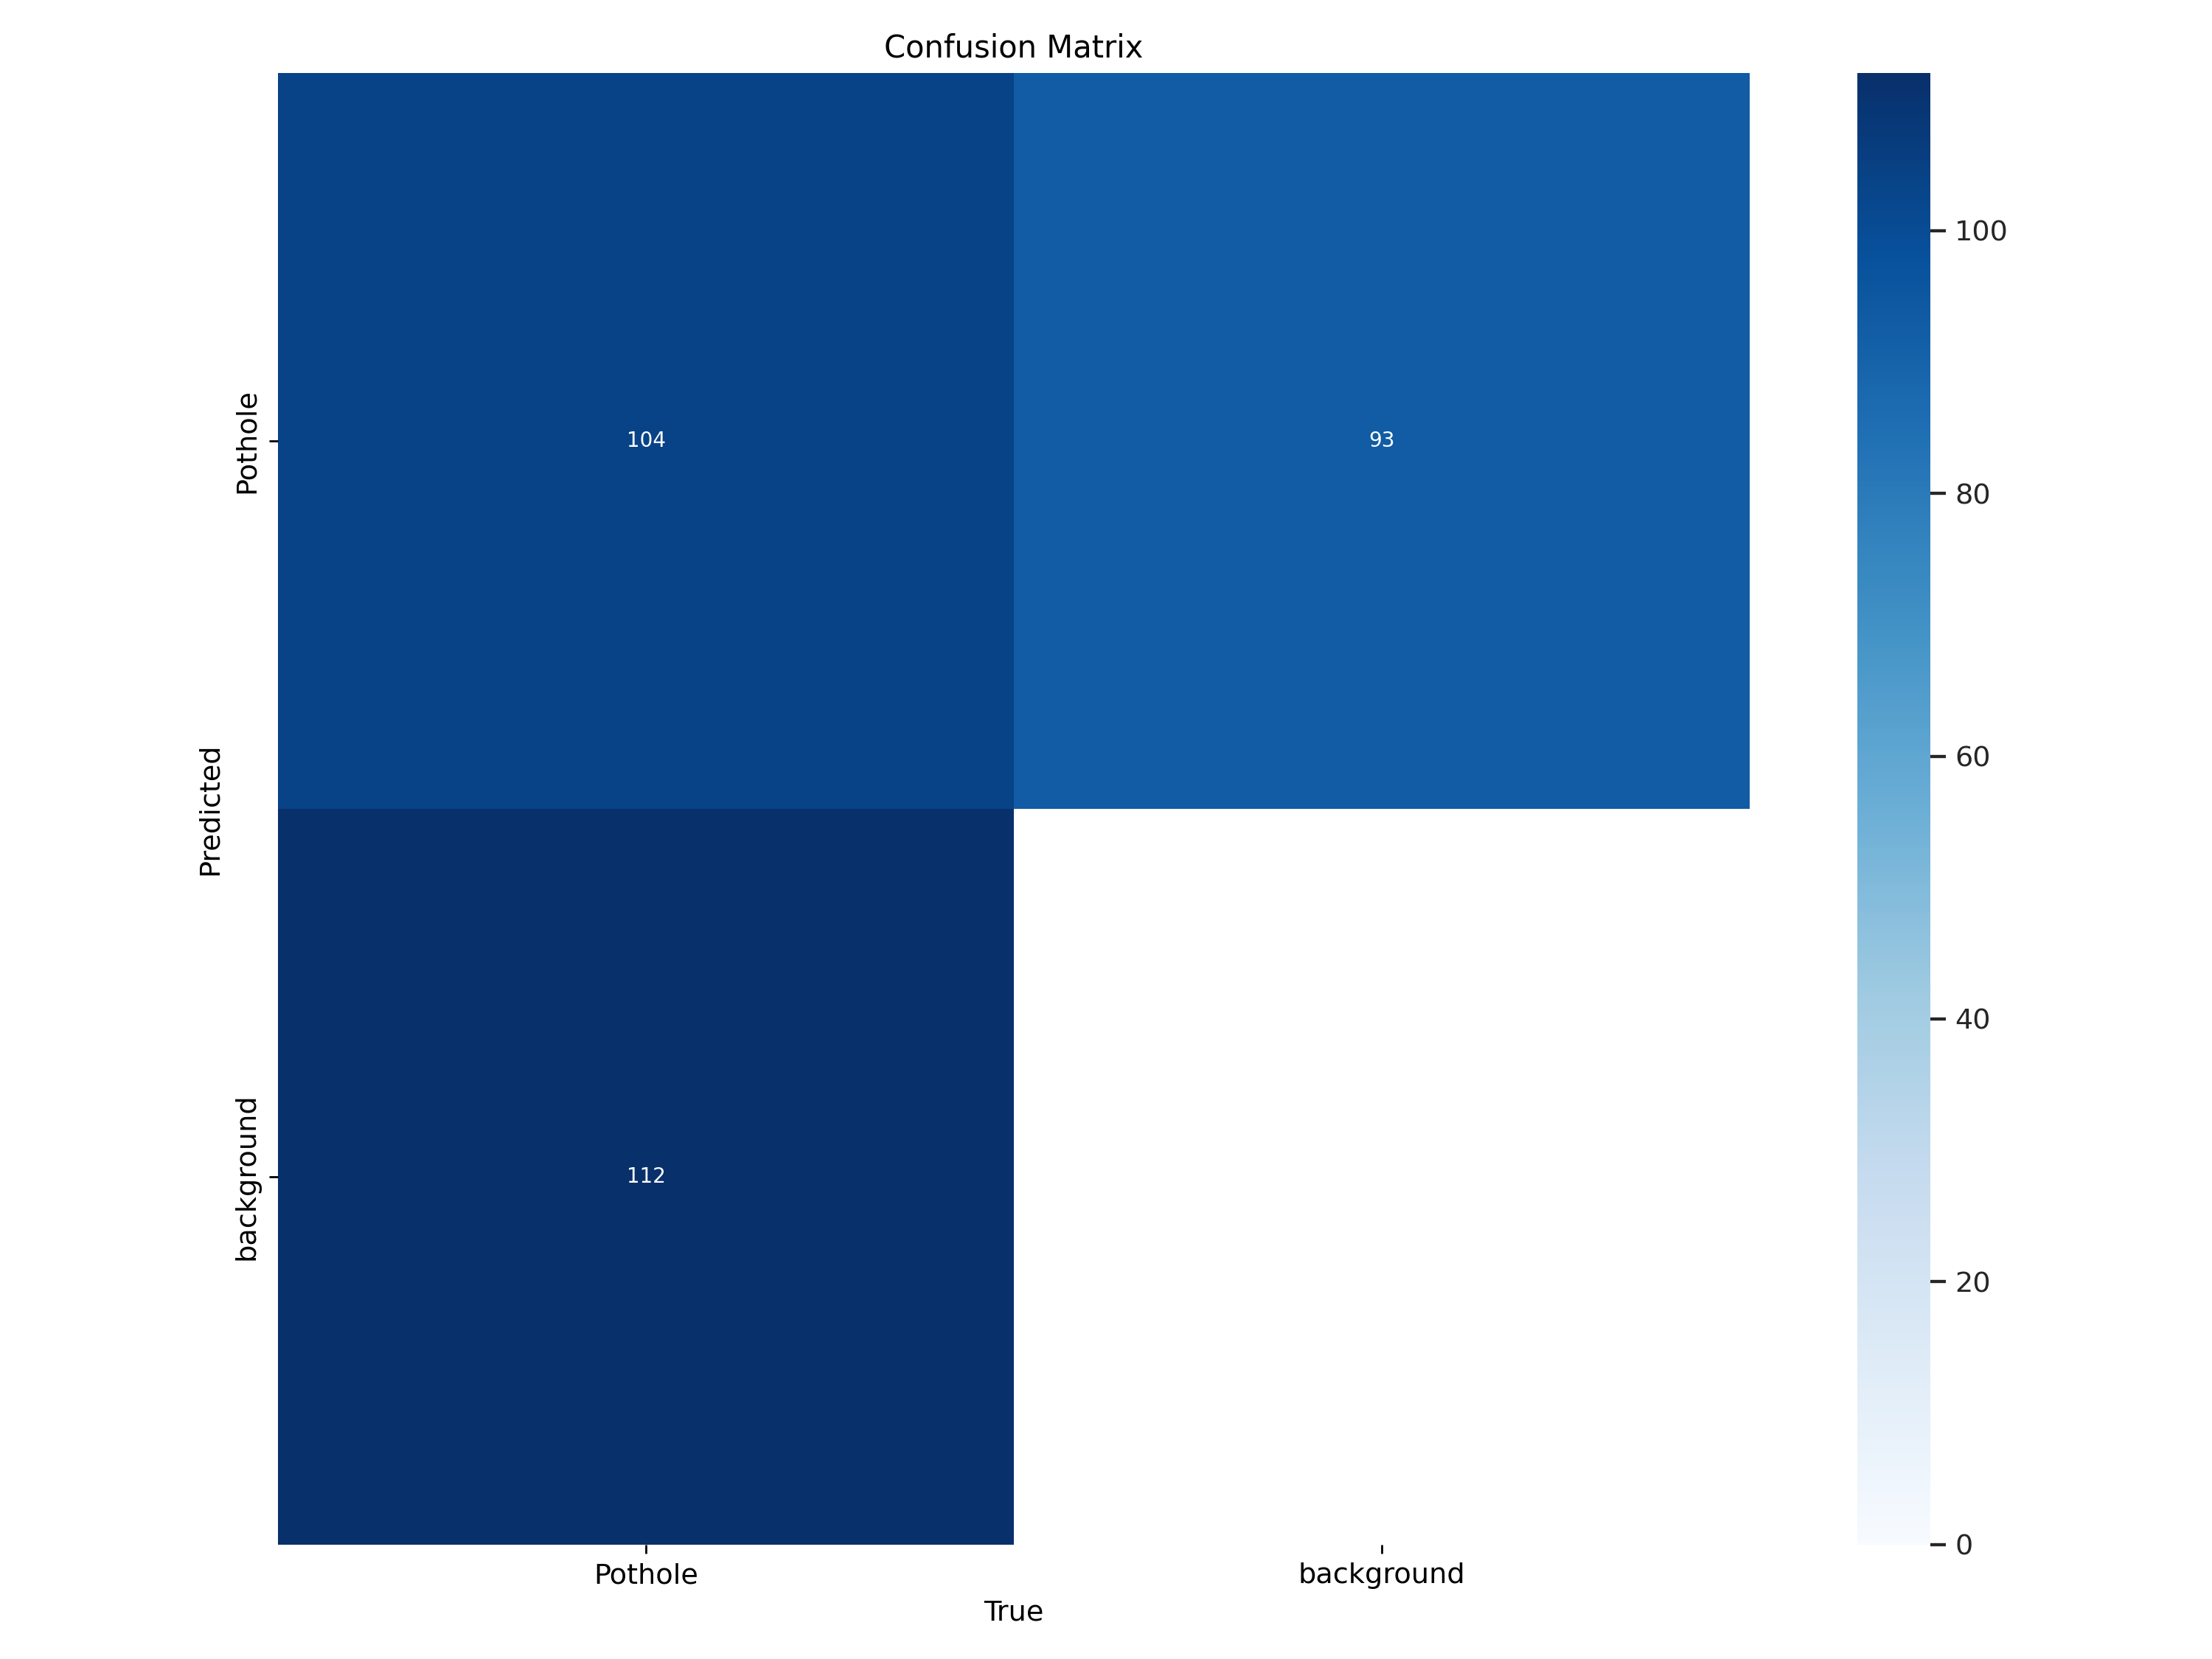

In [ ]:
from IPython.display import Image
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

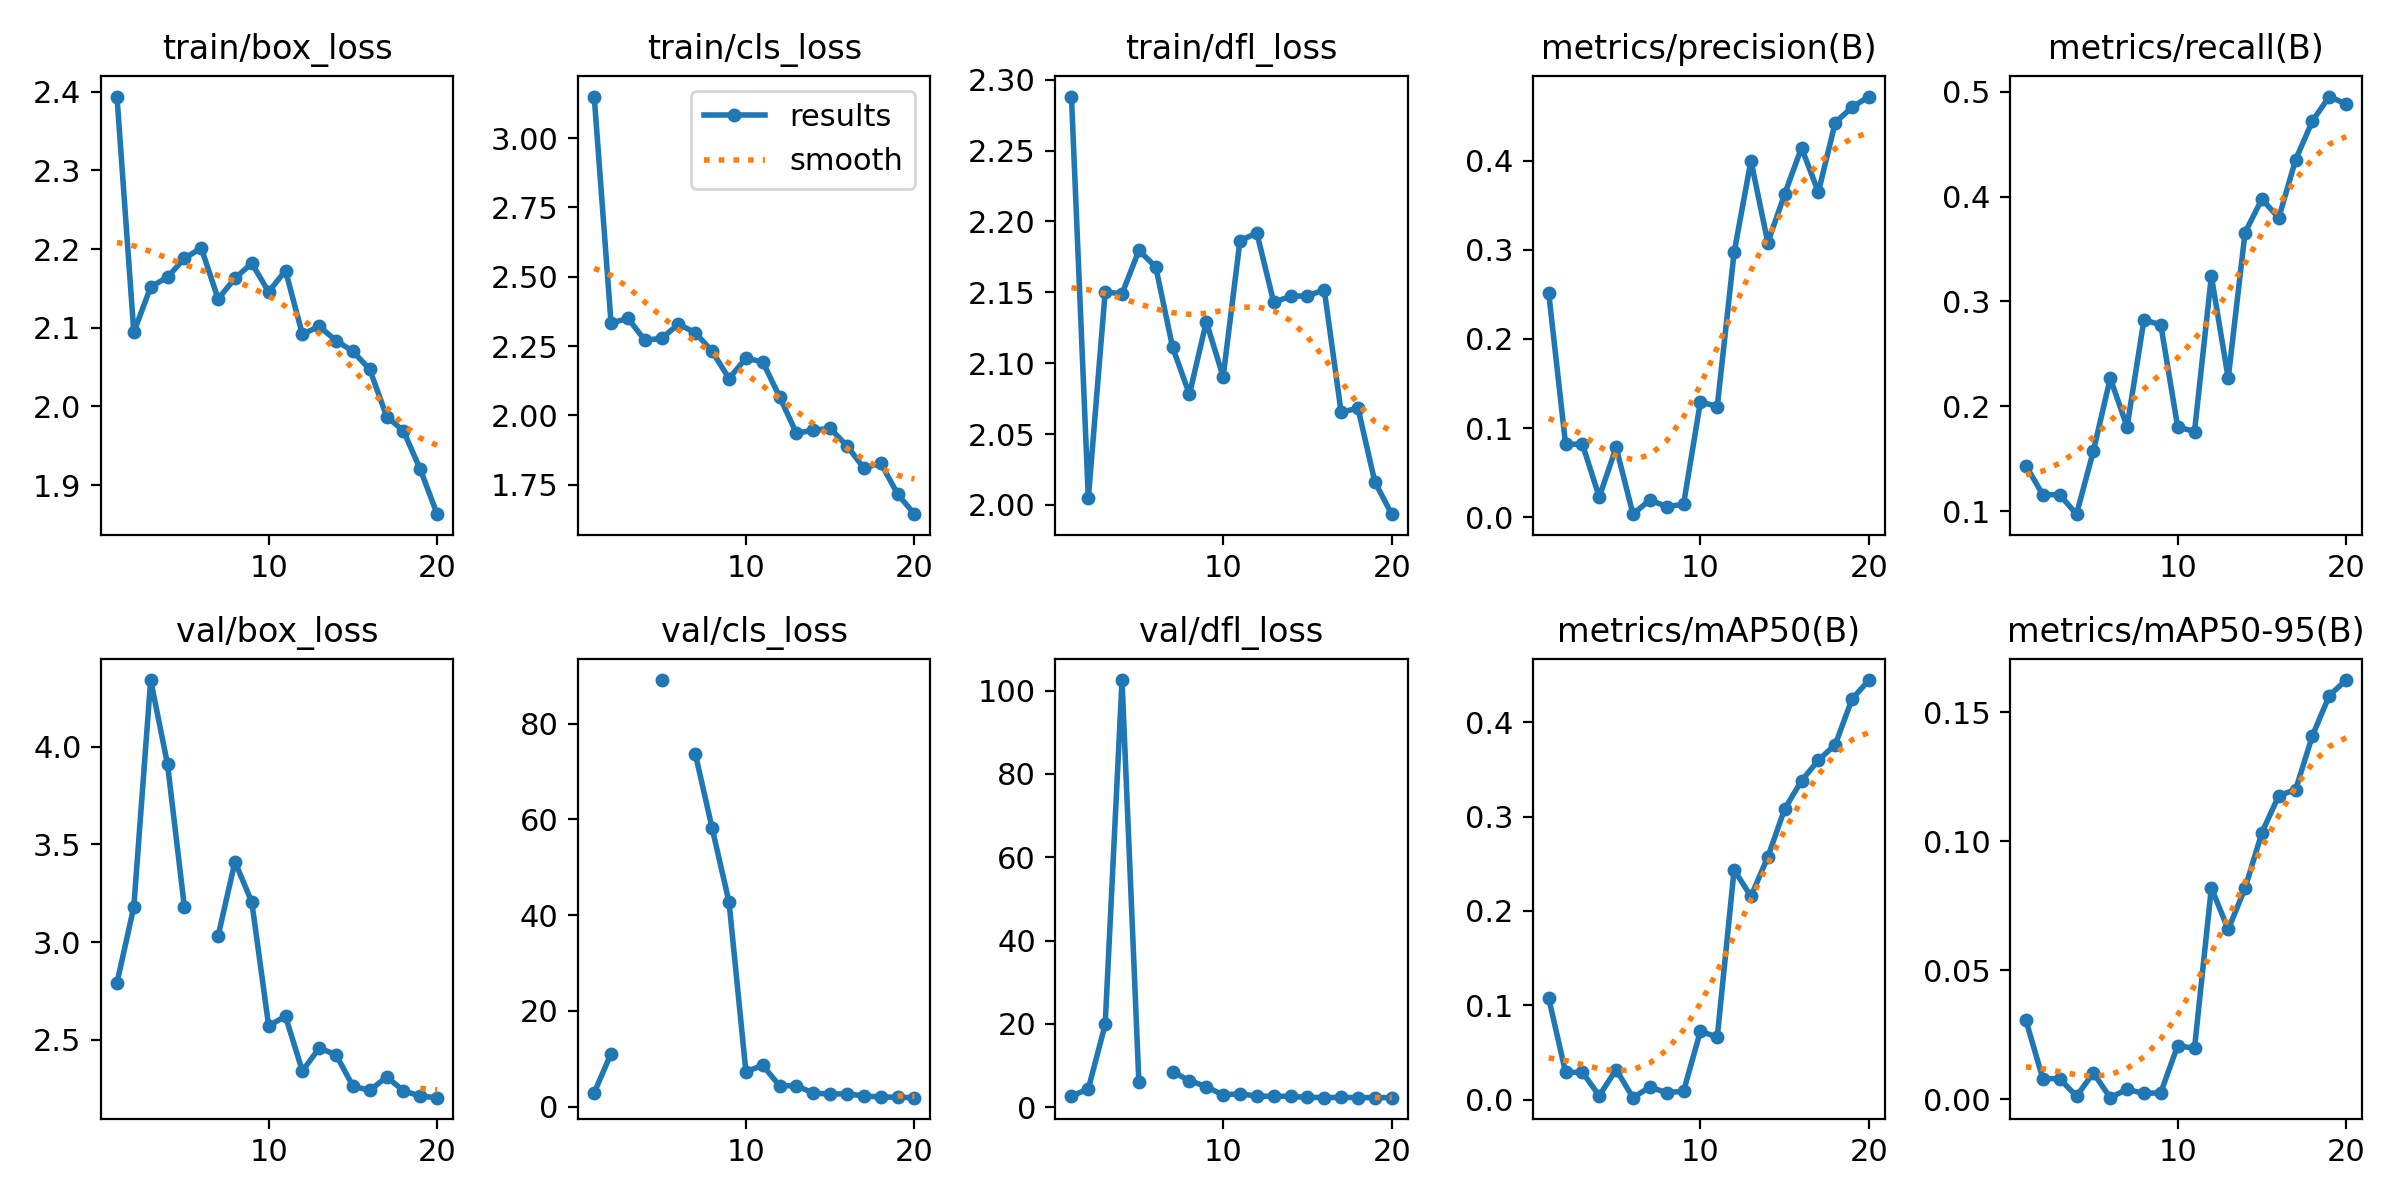

In [ ]:
Image(filename='/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Pothole-Detector--1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train2/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Pothole-Detector--1/valid/labels.cache... 63 images, 0 backgrounds, 0 corrupt: 100% 63/63 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.13it/s]
                   all         63        216      0.472      0.488      0.445      0.163
Speed: 7.2ms preprocess, 22.9ms inference, 0.0ms loss, 14.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" source=/content/Pothole-Detector--1/test/images

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/32 /content/Pothole-Detector--1/test/images/101_jpg.rf.fc2b93dca0b6dc124e2435ee407cdb17.jpg: 640x640 1 Pothole, 37.0ms
image 2/32 /content/Pothole-Detector--1/test/images/102_jpg.rf.75138225a163933d2588b9ef21d05c3b.jpg: 640x640 3 Potholes, 37.0ms
image 3/32 /content/Pothole-Detector--1/test/images/103_jpg.rf.bf3cca5e041f8c16601a12a1ce45f9b1.jpg: 640x640 2 Potholes, 36.9ms
image 4/32 /content/Pothole-Detector--1/test/images/107_jpg.rf.e67f98b96d9389ff1694e7041de4c029.jpg: 640x640 2 Potholes, 37.0ms
image 5/32 /content/Pothole-Detector--1/test/images/120_jpg.rf.93d89b30c011d2379a3e213fb9a9e425.jpg: 640x640 3 Potholes, 37.0ms
image 6/32 /content/Pothole-Detector--1/test/images/128_jpg.rf.1e77cee4a045d063688d1470be4f1a63.jpg: 640x640 1 Pothole, 26.4ms
image 7/32 /content/Pothole-Detector--1/test/images/130_jpg.rf.b8149

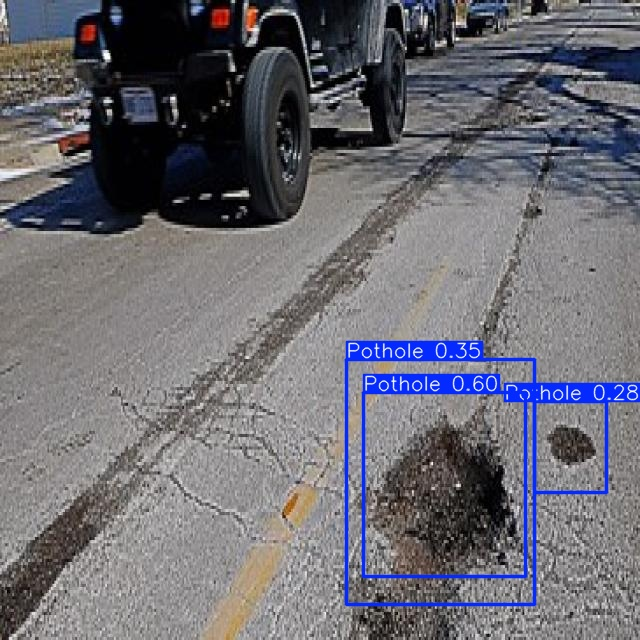

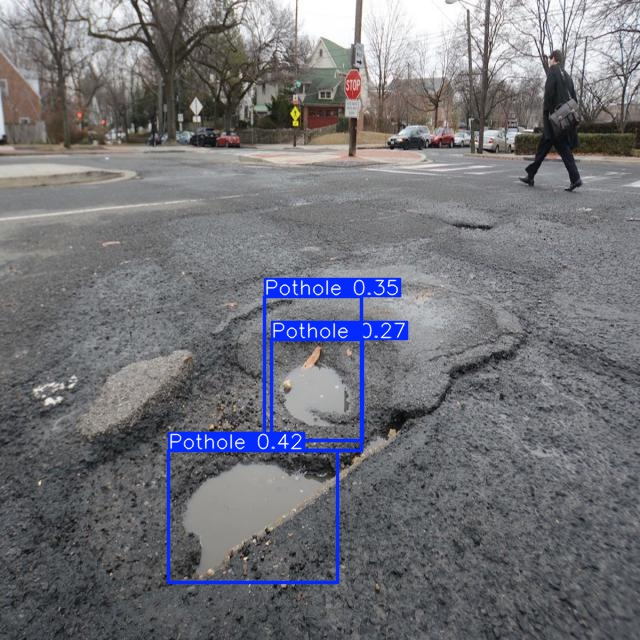

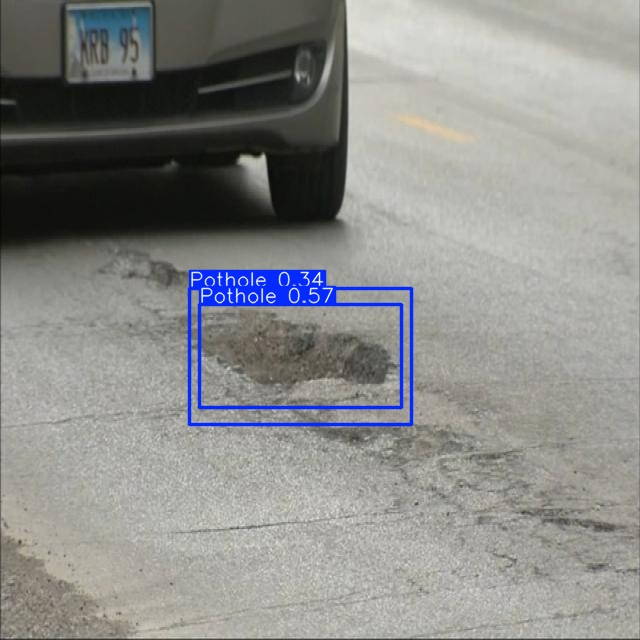

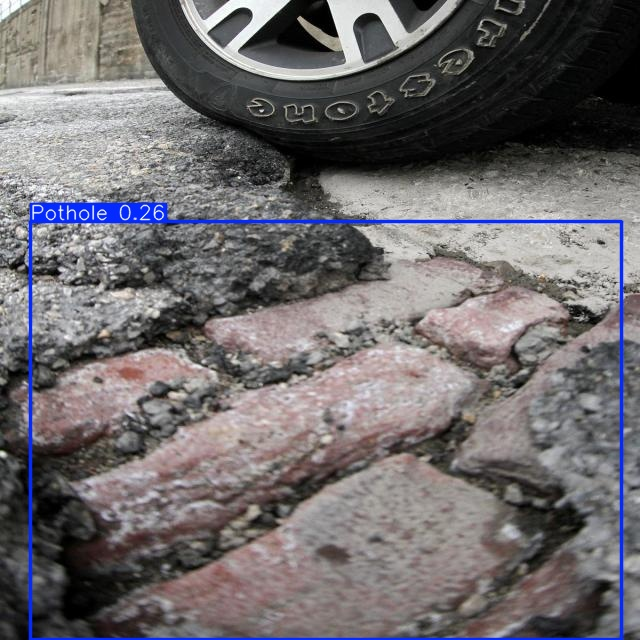

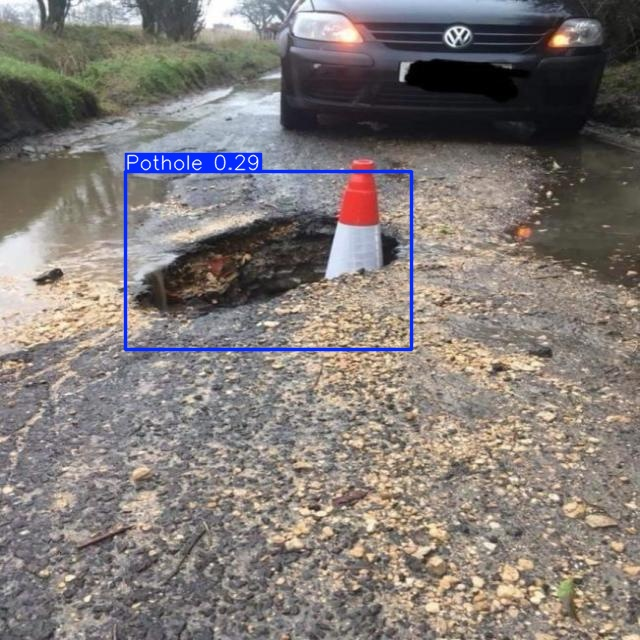

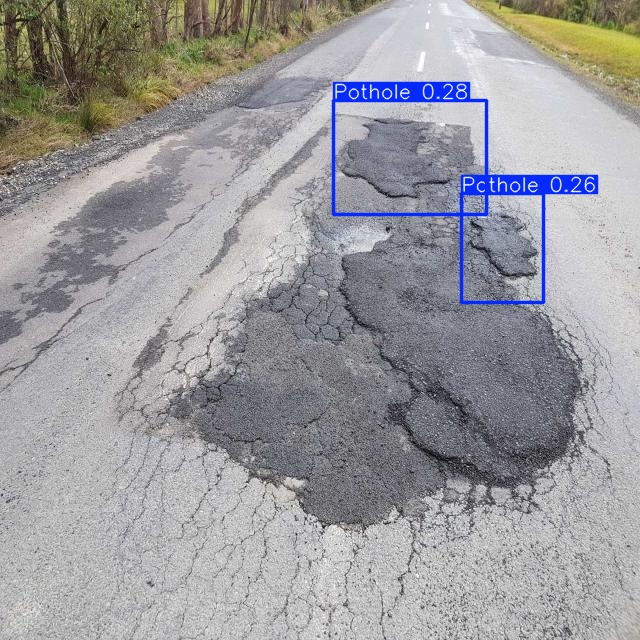

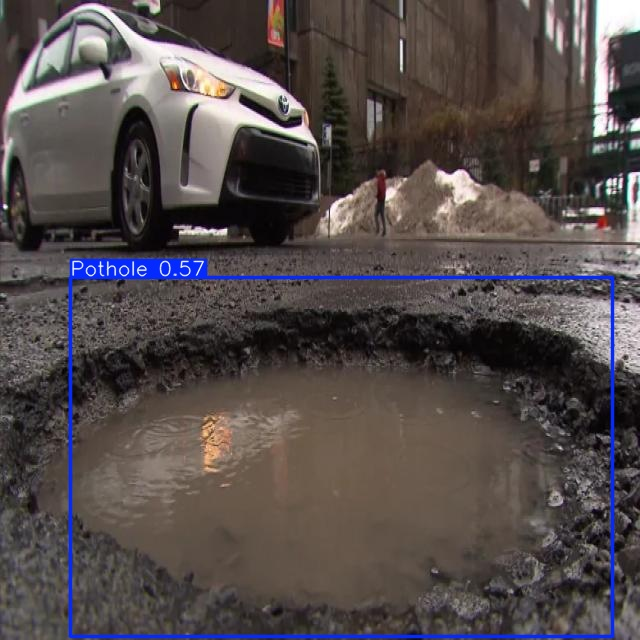

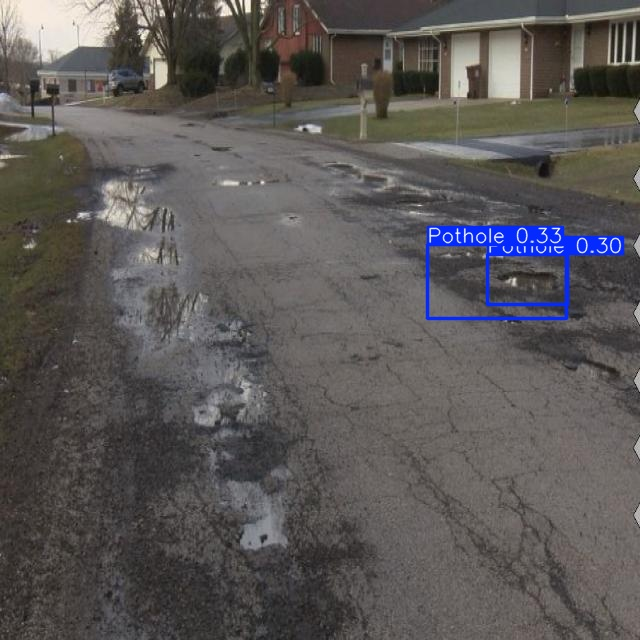

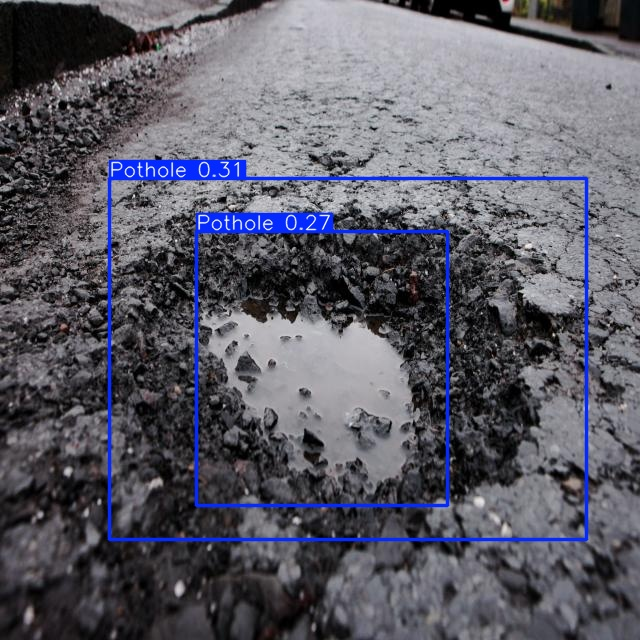

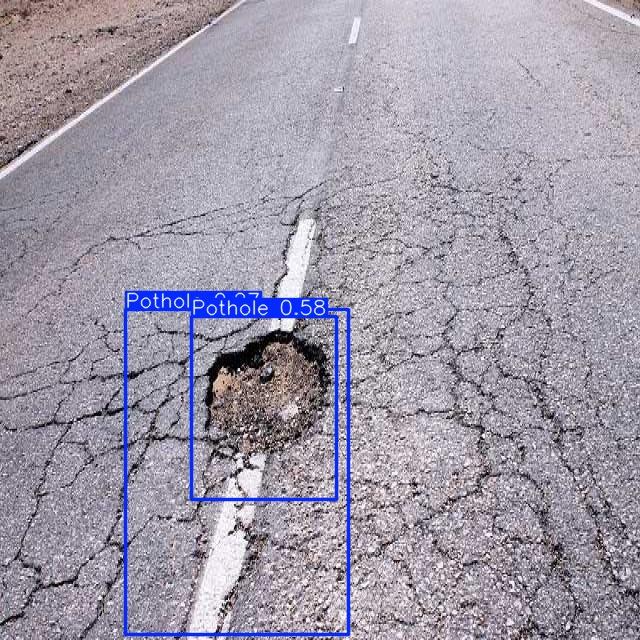

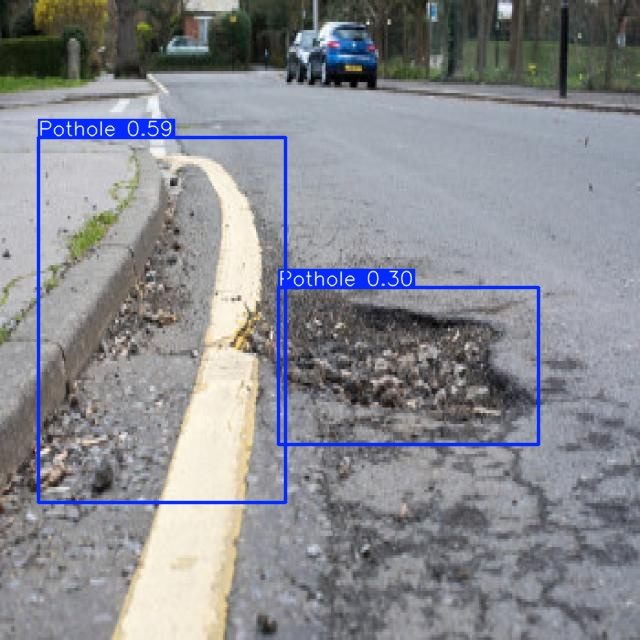

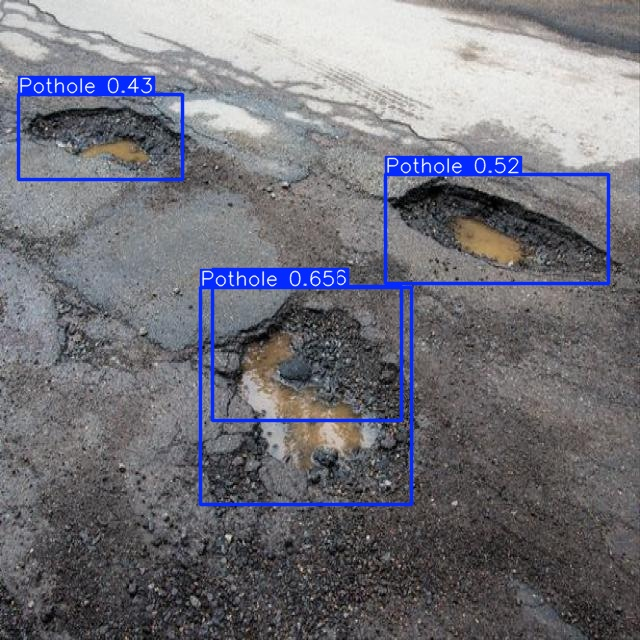

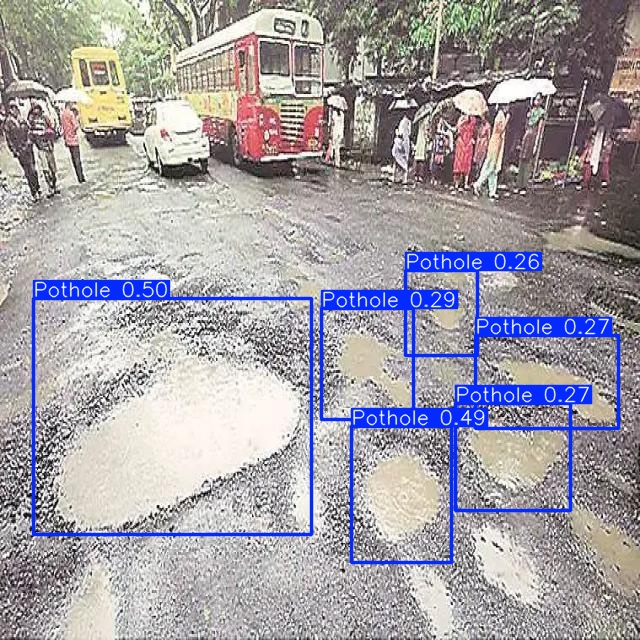

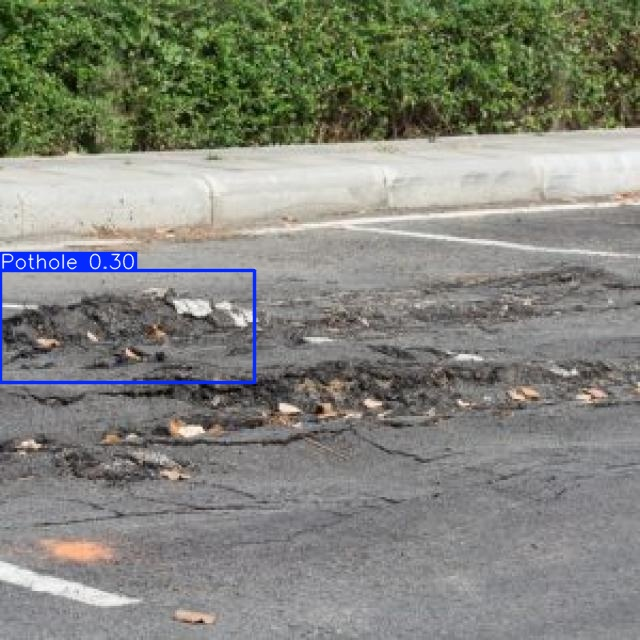

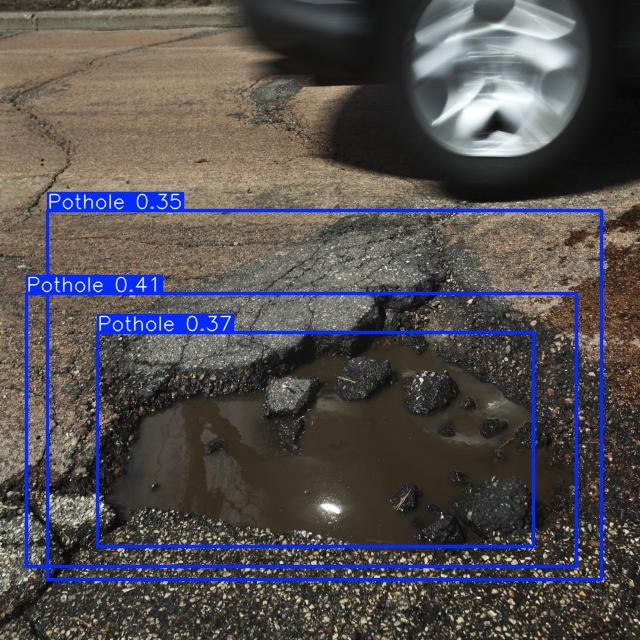

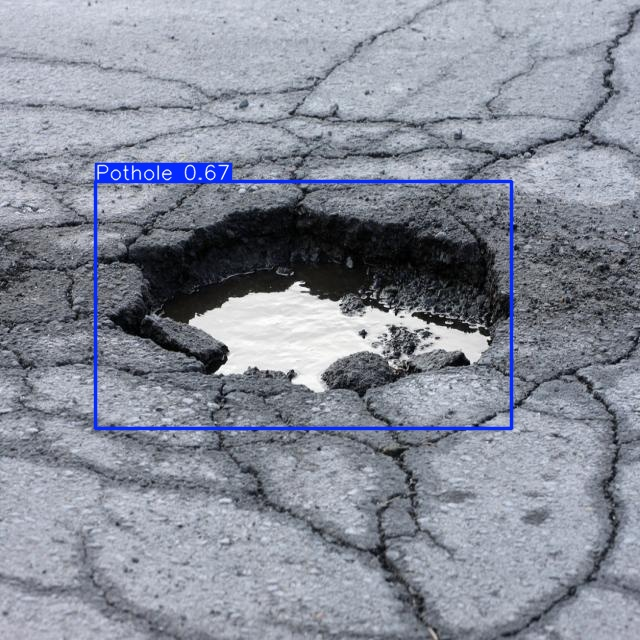

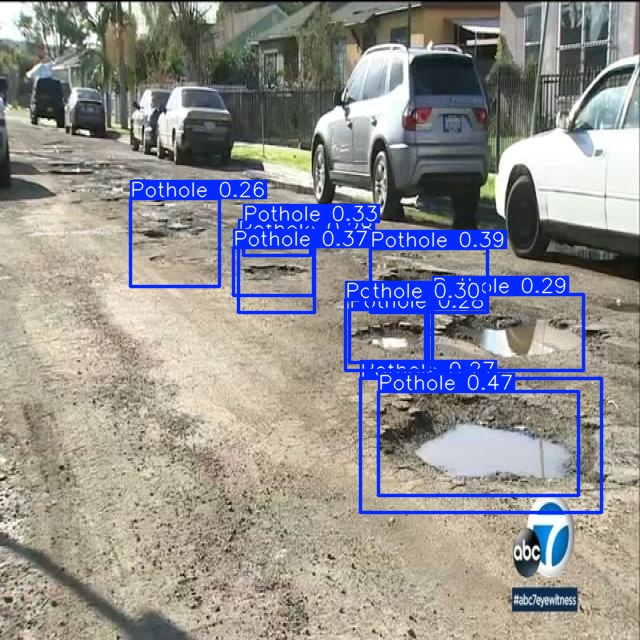

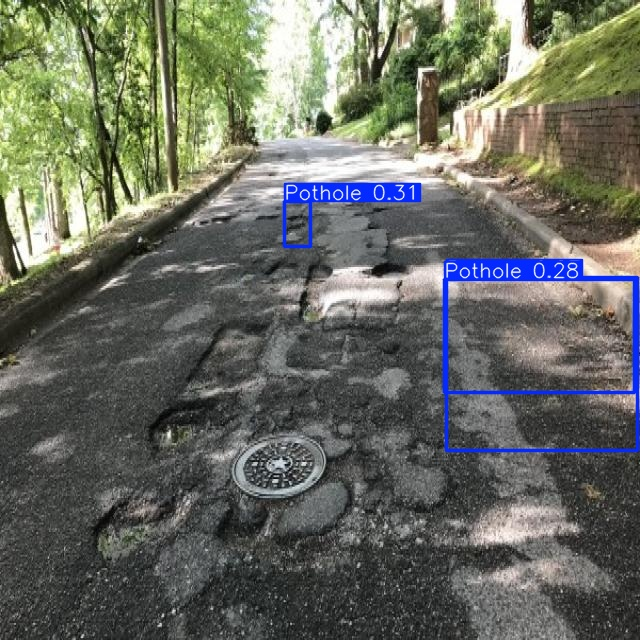

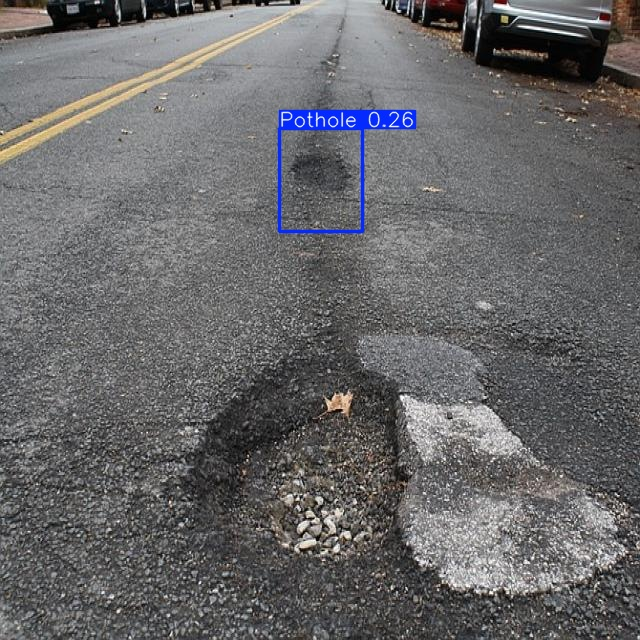

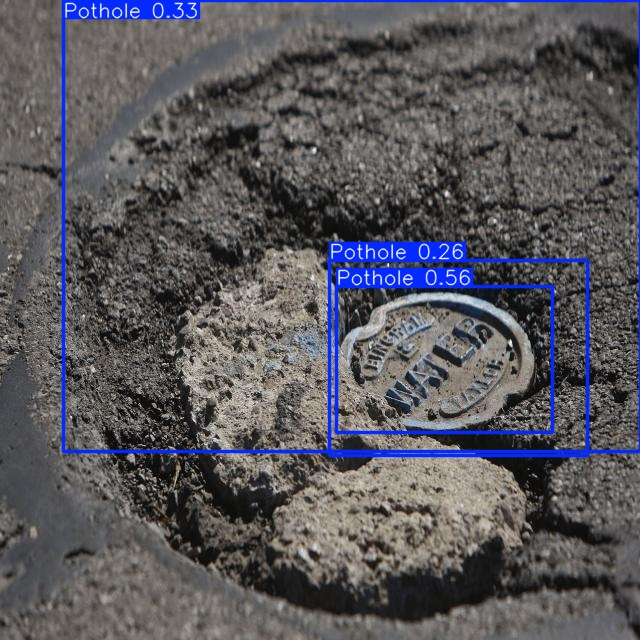

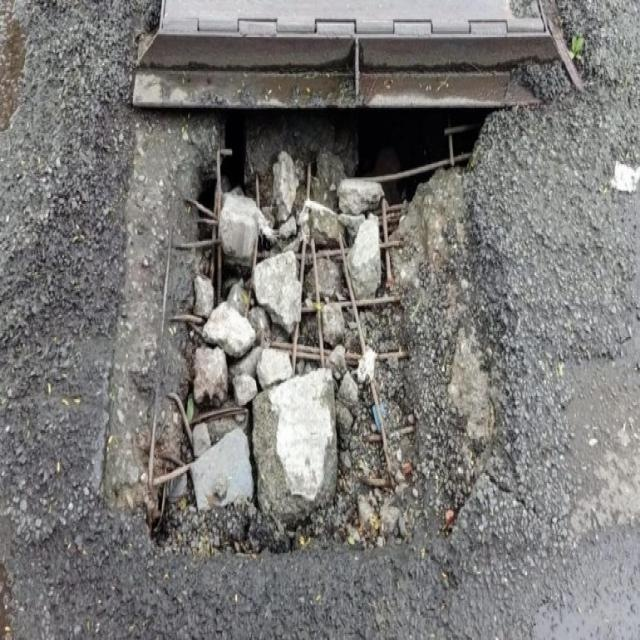

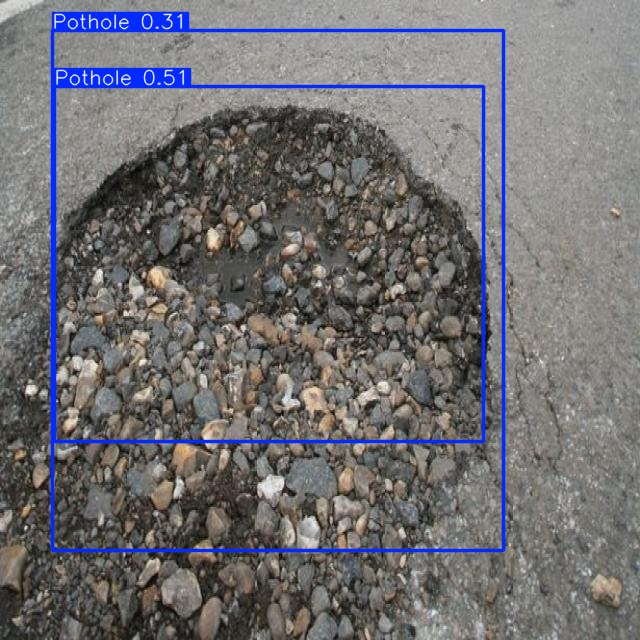

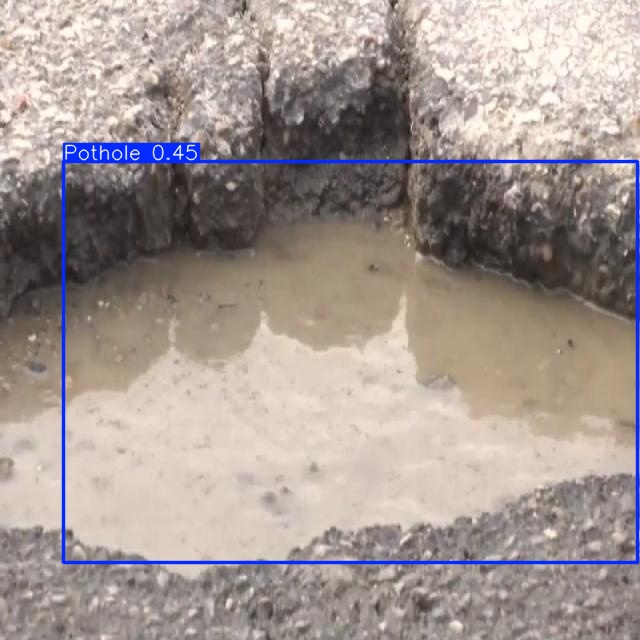

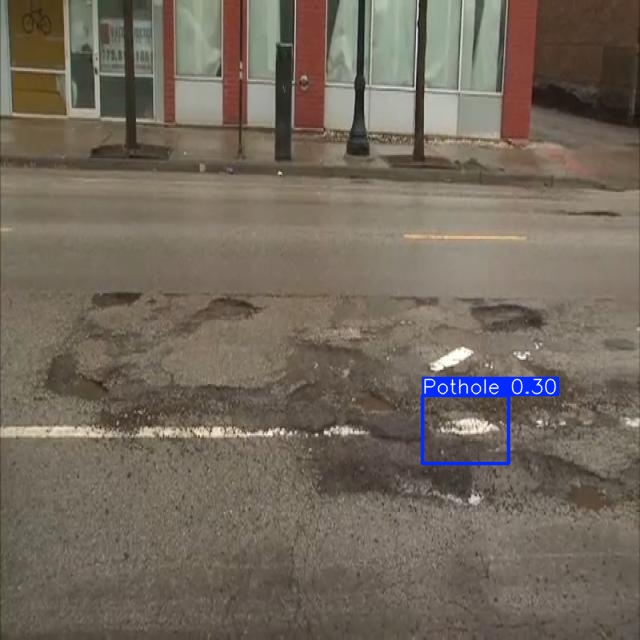

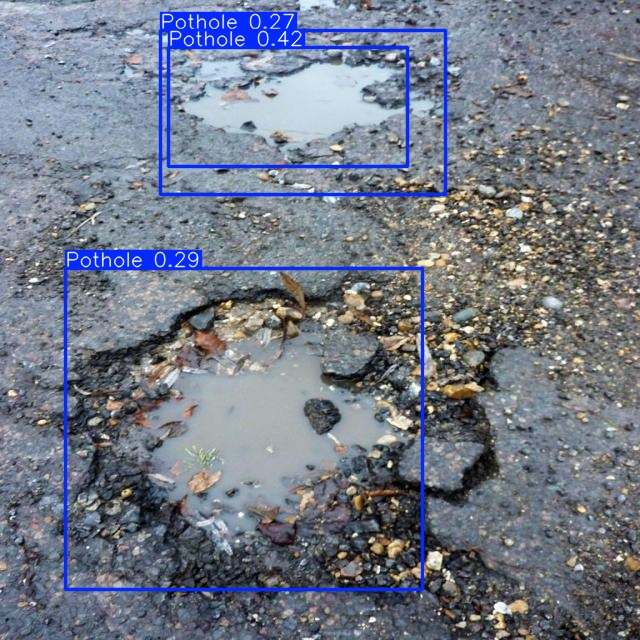

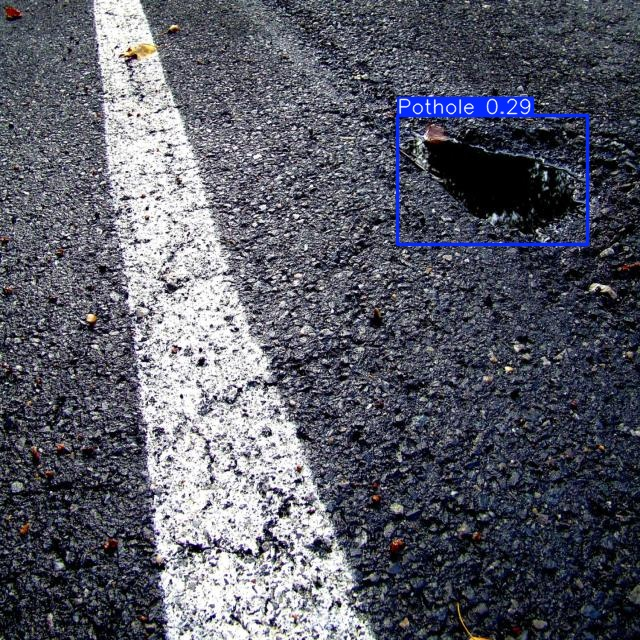

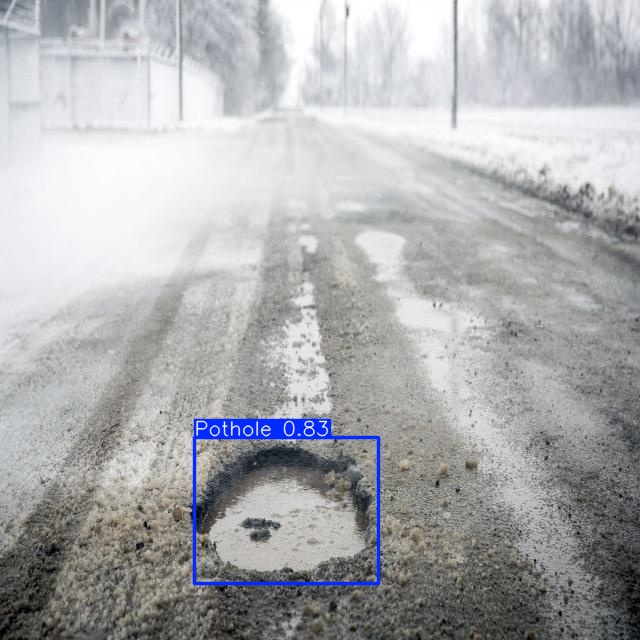

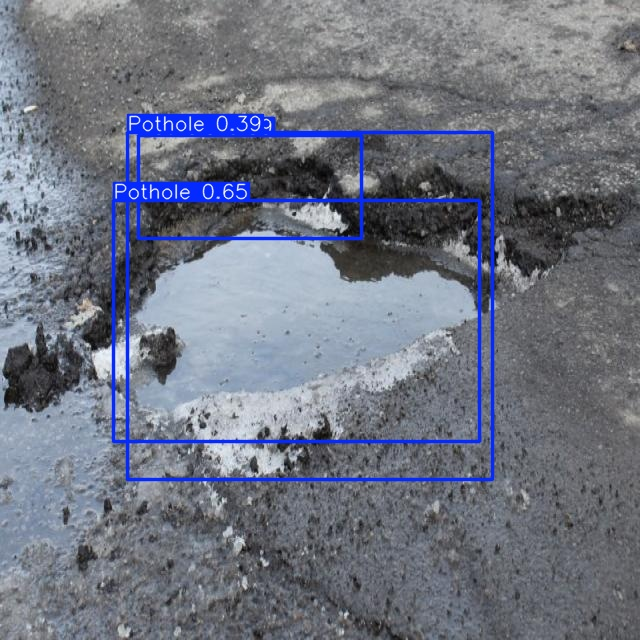

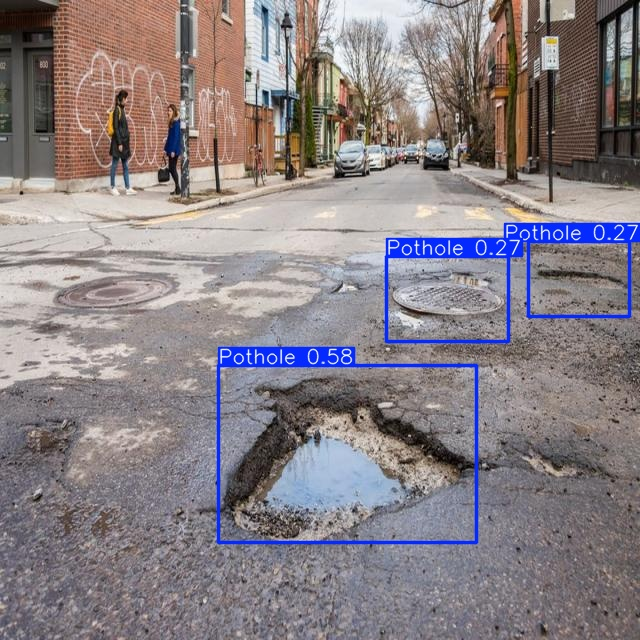

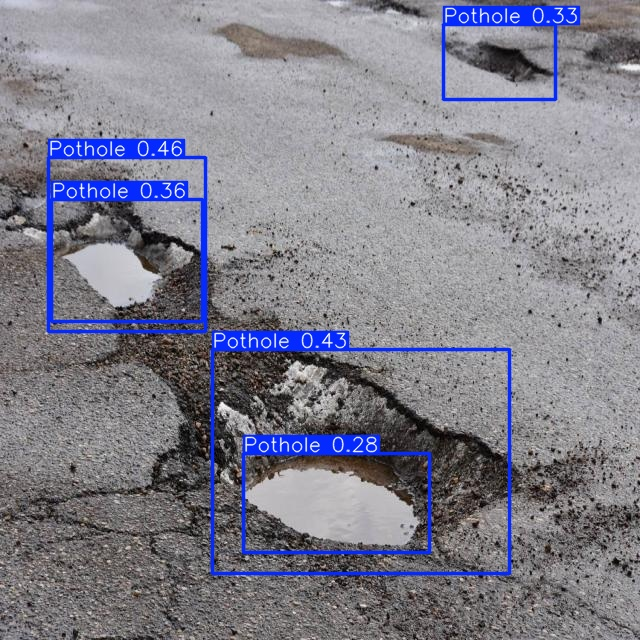

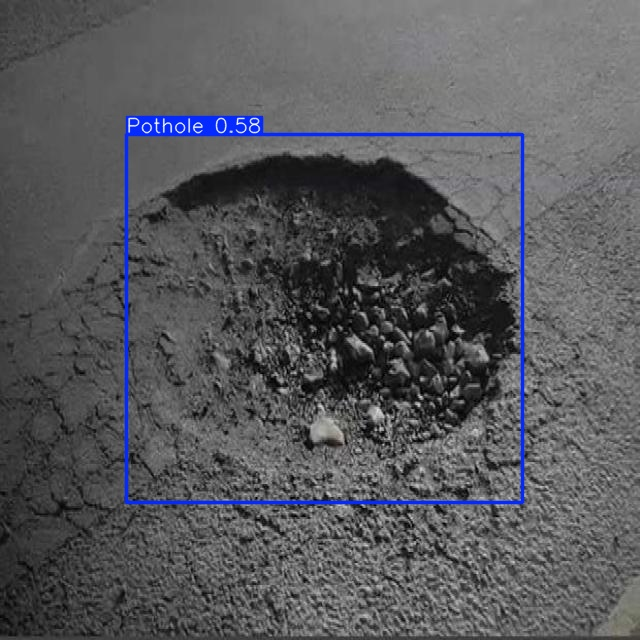

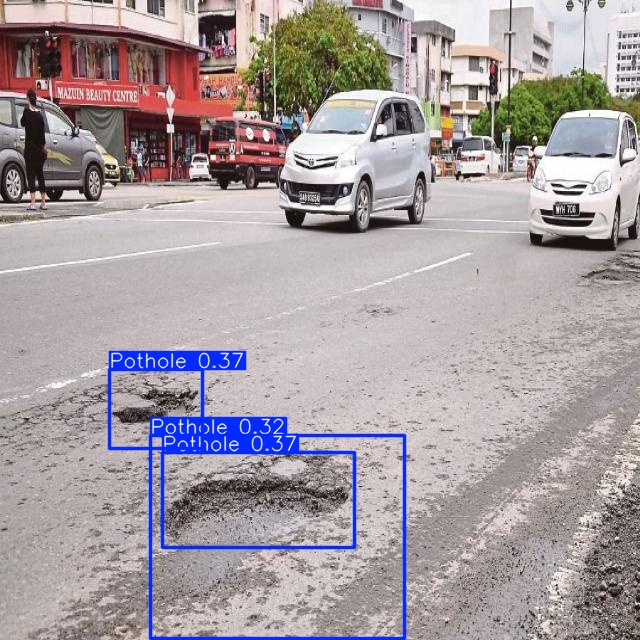

In [ ]:
import glob
from IPython.display import display, Image
for image_path in glob.glob("/content/runs/detect/predict/*.jpg"):
  display(Image(filename=image_path, width=600))
  print("\n")